### This is the weights distribution of 8-bit quantizatioon network without quantization.

In [1]:
import torch
model = torch.load('./results/quan_resnet18/model_best.pth.tar')

In [2]:
model['state_dict'].keys()

odict_keys(['conv1.weight', 'conv1.quantize_input.running_min', 'conv1.quantize_input.running_max', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.conv1.quantize_input.running_min', 'layer1.0.conv1.quantize_input.running_max', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.conv2.quantize_input.running_min', 'layer1.0.conv2.quantize_input.running_max', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.conv1.quantize_input.running_min', 'layer1.1.conv1.quantize_input.running_max', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.conv2.quantize_input.running_min', 'layer1.1.conv2.quantize_input.running_max', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean',

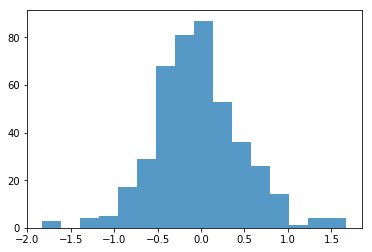

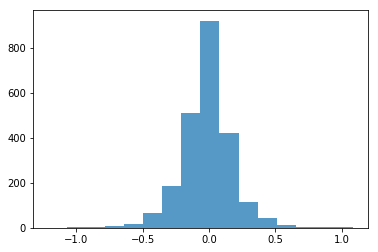

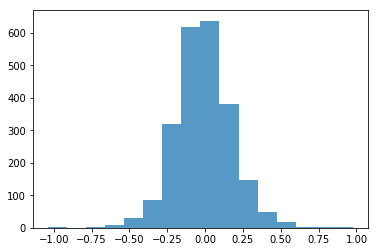

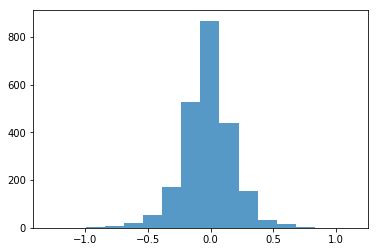

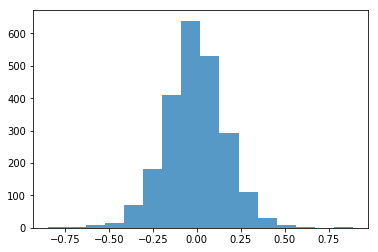

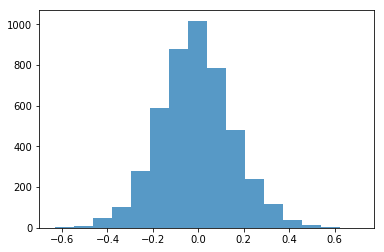

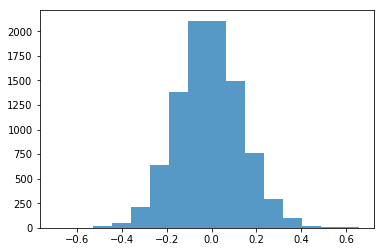

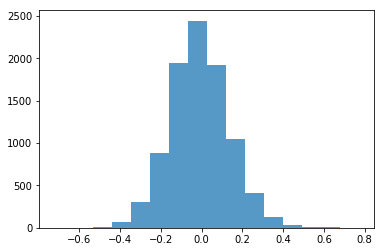

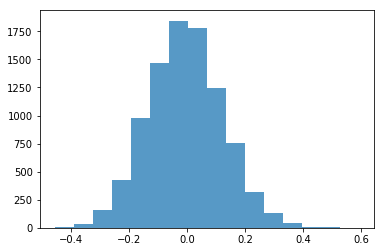

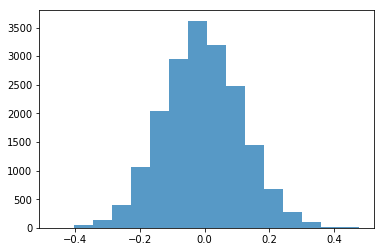

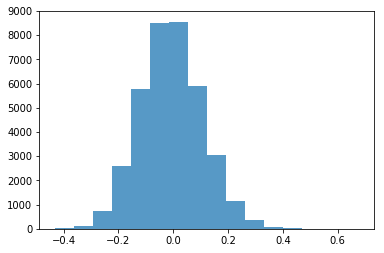

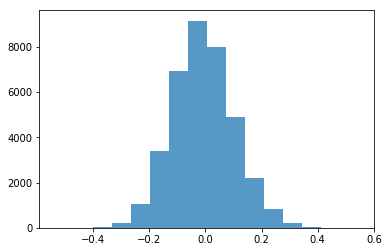

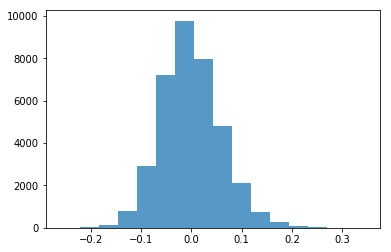

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
for layer in model['state_dict'].keys():
    if 'conv' in layer and 'weight' in layer:
        plt.figure()
        plt.hist(model['state_dict'][layer].reshape(-1),2*8, alpha=0.75)

In [5]:
model = torch.load('./results/quantized_resnet18_pruning/model_best.pth.tar', map_location={'cuda:1': 'cuda:0'})
model['state_dict'].keys()

odict_keys(['conv1.weight', 'conv1.quantize_input.running_min', 'conv1.quantize_input.running_max', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.conv1.quantize_input.running_min', 'layer1.0.conv1.quantize_input.running_max', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.conv2.quantize_input.running_min', 'layer1.0.conv2.quantize_input.running_max', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.conv1.quantize_input.running_min', 'layer1.1.conv1.quantize_input.running_max', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.conv2.quantize_in

### This is the weights distribution of 8-bit quantizatioon network with pruning (50% sparsity).

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


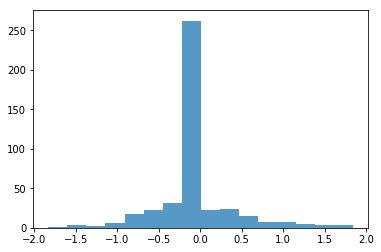

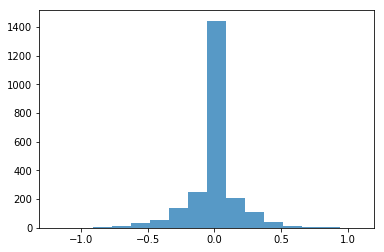

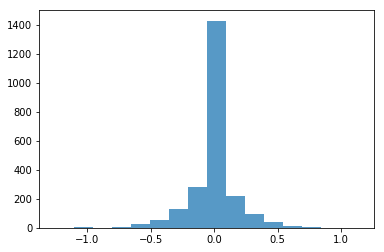

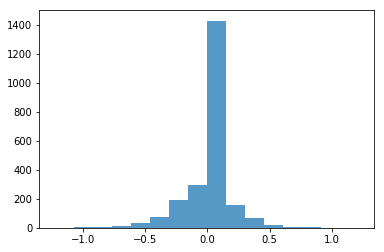

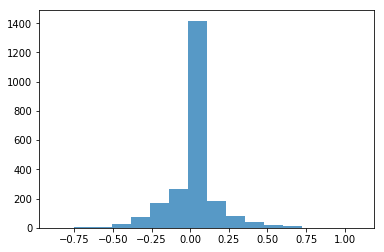

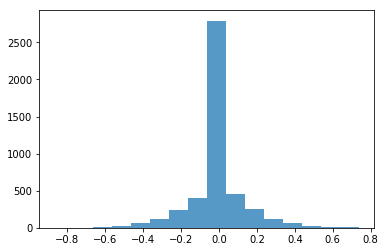

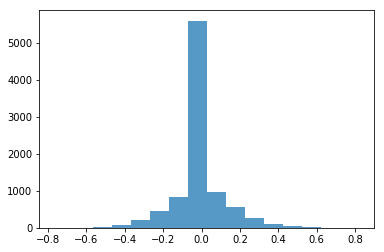

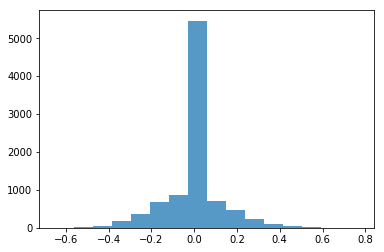

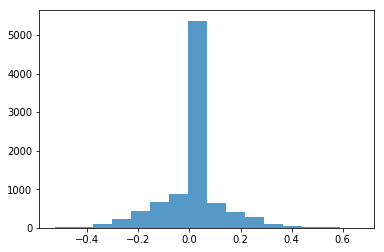

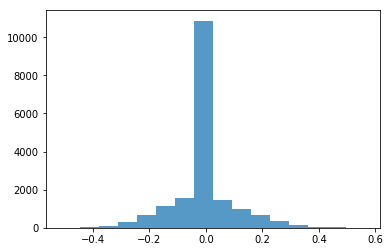

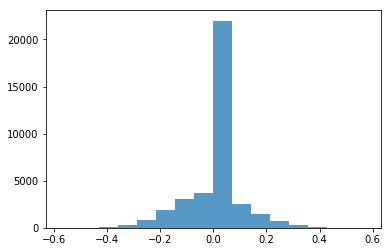

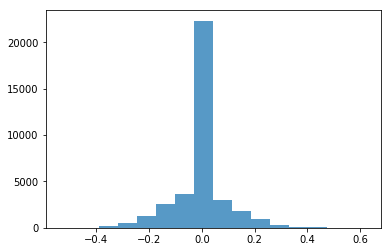

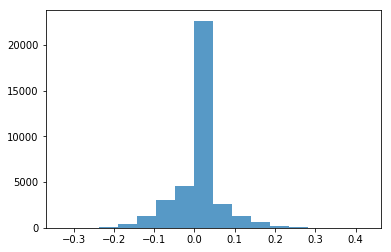

In [7]:
import numpy as np
def prune_weights(wei, perc=50):
    '''Function to prune the weights with percent of zeros'''
    threshold = np.percentile(wei.flatten(),perc)
    pruned_inds = wei.abs() > threshold
    return pruned_inds.float()


for layer in model['state_dict'].keys():
    if 'conv' in layer and 'weight' in layer:
        plt.figure()
        wei = model['state_dict'][layer] * prune_weights(model['state_dict'][layer],50)
        plt.hist(wei.reshape(-1),2*8, alpha=0.75)

In [15]:
count = 0
for layer in model['state_dict'].keys():
    if 'conv' in layer and 'weight' in layer:
        count += 1
        if (count == 8):
            wei_np = wei.cpu().numpy()
            wei_np = np.reshape(wei_np, (wei_np.shape[0], wei_np.shape[1]*wei_np.shape[2]*wei_np.shape[3]))
            print(wei_np.shape)
            np.save("test_weight", wei_np)
    

(64, 576)


64